# Data Pre-Processing

In [221]:
#import libraries
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the data
data = pd.read_csv('~/Desktop/Git-projects/Seaborn/seaborn/bundesliga_player.csv')
data.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


## Initial Data Inspection

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        515 non-null    int64  
 1   name              515 non-null    object 
 2   full_name         229 non-null    object 
 3   age               515 non-null    int64  
 4   height            515 non-null    float64
 5   nationality       515 non-null    object 
 6   place_of_birth    510 non-null    object 
 7   price             510 non-null    float64
 8   max_price         510 non-null    float64
 9   position          515 non-null    object 
 10  shirt_nr          515 non-null    int64  
 11  foot              506 non-null    object 
 12  club              515 non-null    object 
 13  contract_expires  481 non-null    object 
 14  joined_club       515 non-null    object 
 15  player_agent      488 non-null    object 
 16  outfitter         193 non-null    object 
dt

In [223]:
data.describe()

,Unnamed: 0,age,height,price,max_price,shirt_nr
count,515.000000,515.000000,515.000000,510.000000,510.000000,515.000000
mean,257.000000,25.683495,1.847612,8.482794,13.513627,19.798058
std,148.811962,4.700238,0.060996,14.653440,18.659222,12.414768
min,0.000000,17.000000,1.680000,0.025000,0.100000,1.000000
25%,128.500000,22.000000,1.800000,1.200000,2.500000,9.000000
50%,257.000000,25.000000,1.850000,3.500000,7.000000,20.000000
75%,385.500000,29.000000,1.890000,9.000000,16.750000,29.000000
max,514.000000,39.000000,2.000000,120.000000,150.000000,49.000000


In [224]:
data.columns

Index(['Unnamed: 0', 'name', 'full_name', 'age', 'height', 'nationality',
       'place_of_birth', 'price', 'max_price', 'position', 'shirt_nr', 'foot',
       'club', 'contract_expires', 'joined_club', 'player_agent', 'outfitter'],
      dtype='object')

# Data cleaning

In [225]:
#print the null data of each column
print(data.isnull().sum())

#check the missing percentage
total_cell = np.product(data.shape)
missing = data.isnull().sum().sum()
percent_missing = (missing/total_cell) * 100
print(f'missing percentage before cleaning: {percent_missing:.2f}%')

Unnamed: 0            0
name                  0
full_name           286
age                   0
height                0
nationality           0
place_of_birth        5
price                 5
max_price             5
position              0
shirt_nr              0
foot                  9
club                  0
contract_expires     34
joined_club           0
player_agent         27
outfitter           322
dtype: int64
missing percentage before cleaning: 7.92%


In [226]:
#replace null values with 'Unknown' 
data['place_of_birth'].fillna('Unknown', inplace=True)

#replace null values with its name column value 
data['full_name'].fillna(data['name'], inplace=True)

#replace null values with the mean of the column
data['price'].fillna(data['price'].mean(), inplace=True)
data['max_price'].fillna(data['max_price'].mean(), inplace=True)

#replace null values with 'No outfitter'
data['outfitter'].fillna('No outfitter', inplace=True)

#drop the rest of the row with null values
data = data.dropna(axis=0, how='any')



In [227]:
#check the null values again
print(data.isnull().sum())

#check the missing percentage again
total_cell = np.product(data.shape)
missing = data.isnull().sum().sum()
percent_missing = (missing/total_cell) * 100
print(f'missing percentage after cleaning: {percent_missing:.2f}%')

Unnamed: 0          0
name                0
full_name           0
age                 0
height              0
nationality         0
place_of_birth      0
price               0
max_price           0
position            0
shirt_nr            0
foot                0
club                0
contract_expires    0
joined_club         0
player_agent        0
outfitter           0
dtype: int64
missing percentage after cleaning: 0.00%


## Nationality
Some players have dual nationality, we will create a new column and store only the first nationality mentioned in the nationality column.

In [228]:
#remove the extra space in the column
data['nationality'] = data['nationality'].str.strip()
#create a new column first_nationality, and store the first nationality in it
data['first_nationality'] = data['nationality'].str.split().str[0]

#compare the unique value of two nationality columns
print(data['nationality'].nunique())
print(data['first_nationality'].nunique())

134
61


In [229]:
#compare the value of two nationality columns
print(data[['first_nationality', 'nationality']].head(10))

   first_nationality            nationality
0            Germany                Germany
1        Switzerland            Switzerland
2            Germany                Germany
4        Netherlands            Netherlands
5             France  France  Guinea-Bissau
6             France          France  Spain
7             Canada        Canada  Liberia
8        Netherlands            Netherlands
9           Portugal               Portugal
10            France                 France


# Visualisation

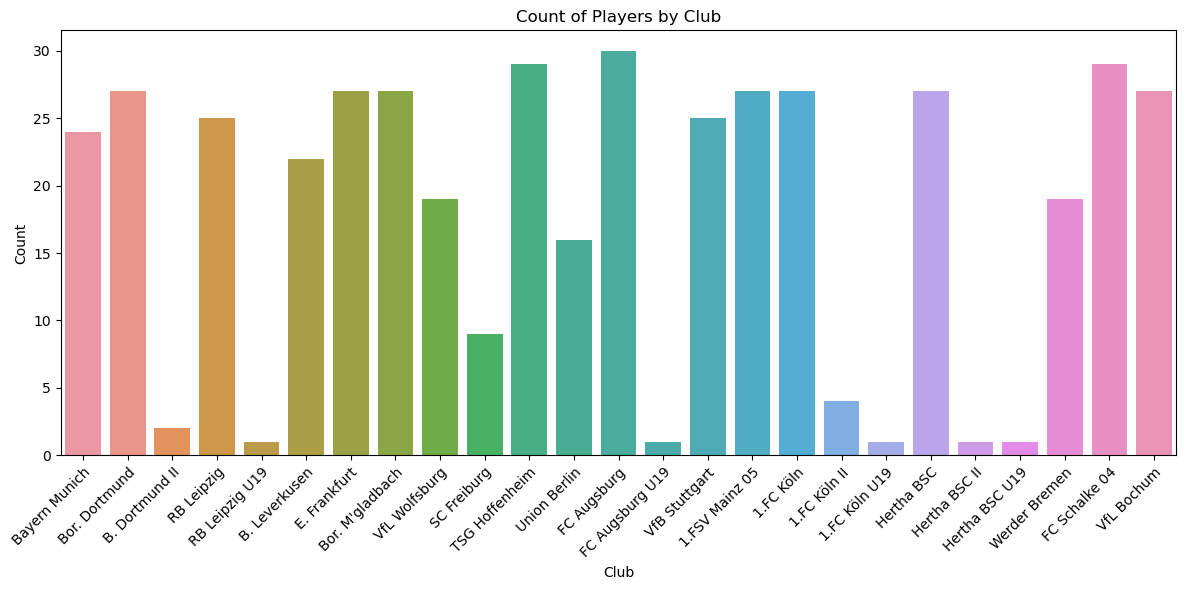

In [230]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='club')
plt.xlabel('Club')
plt.ylabel('Count')
plt.title('Count of Players by Club')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()

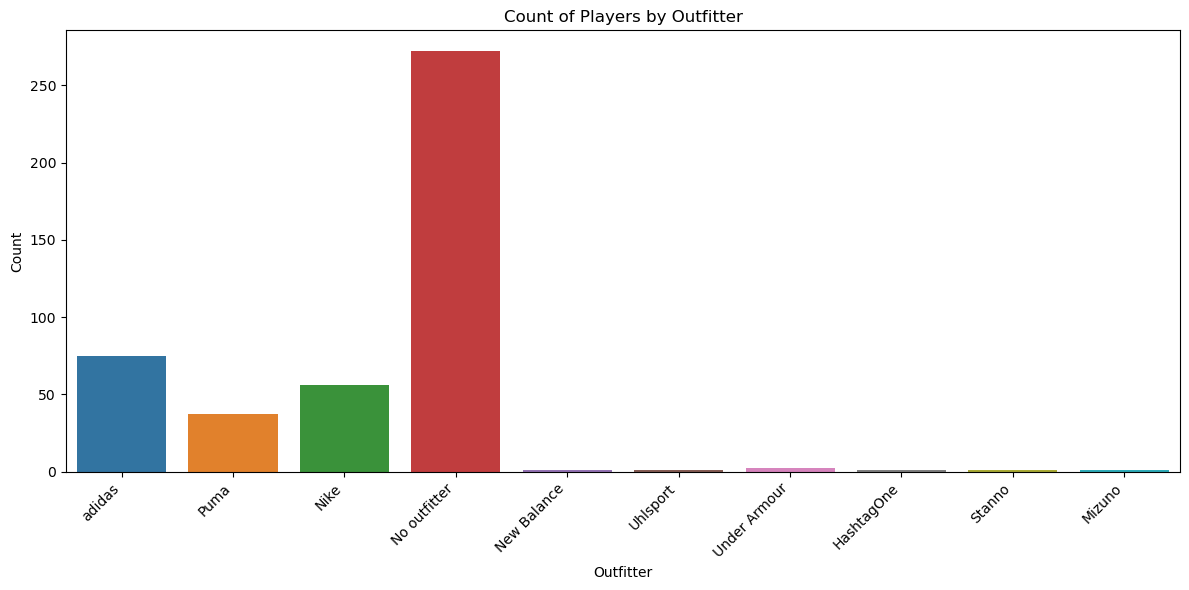

In [231]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data,x='outfitter')
plt.xlabel('Outfitter')
plt.ylabel('Count')
plt.title('Count of Players by Outfitter')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

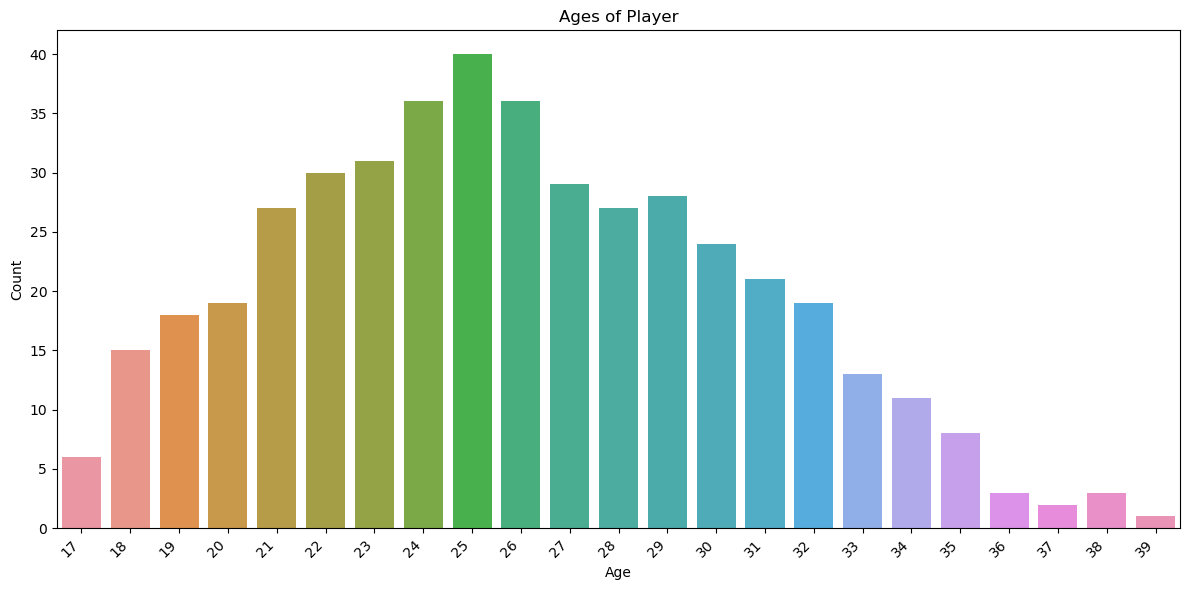

In [232]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data,x='age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages of Player')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

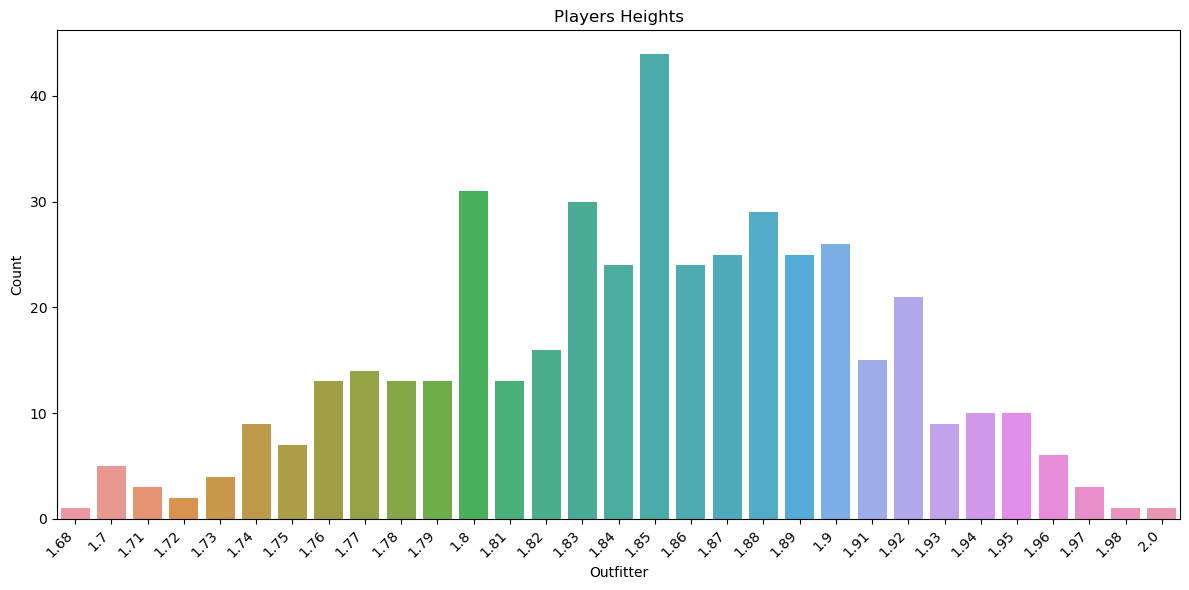

In [233]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data,x='height')
plt.xlabel('Outfitter')
plt.ylabel('Count')
plt.title('Players Heights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

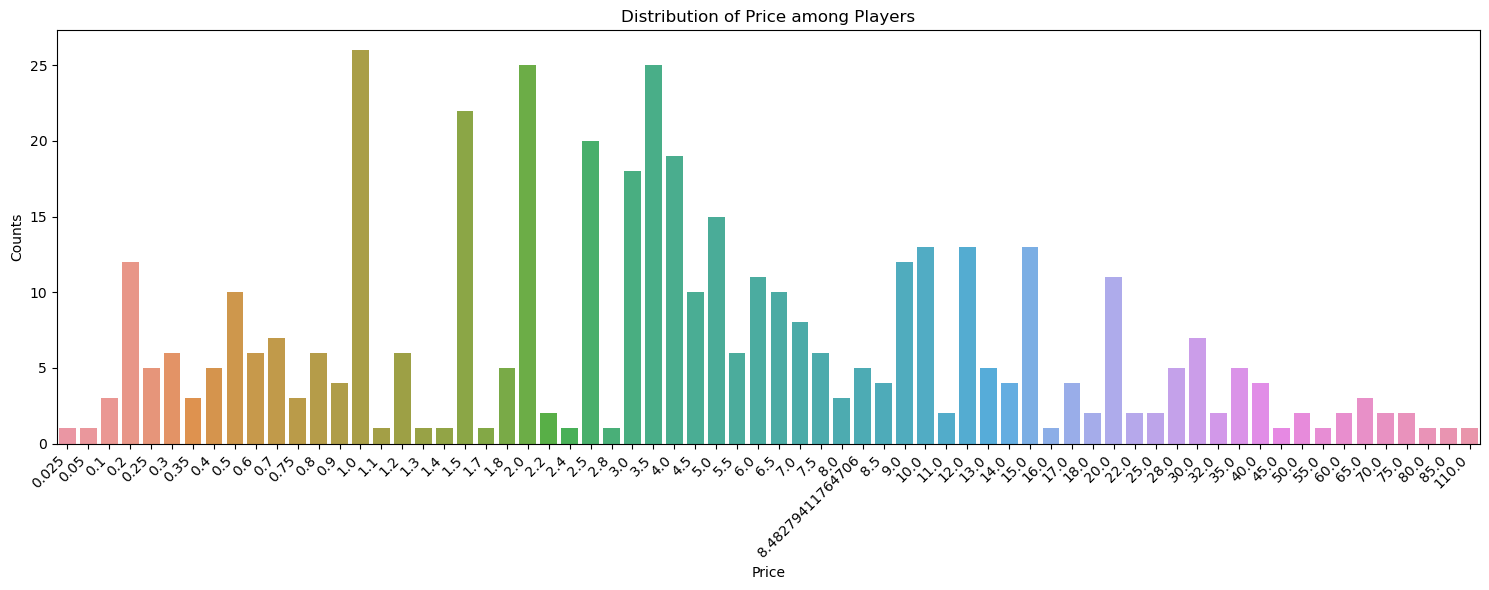

In [234]:
plt.figure(figsize=(15, 6))
sns.countplot(data=data,x='price')
plt.ylabel('Counts')
plt.xlabel('Price')
plt.title('Distribution of Price among Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

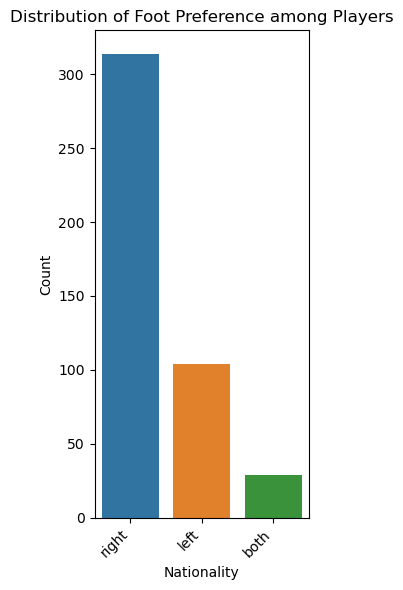

In [235]:
plt.figure(figsize=(3, 6))
sns.countplot(data=data,x='foot')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Distribution of Foot Preference among Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

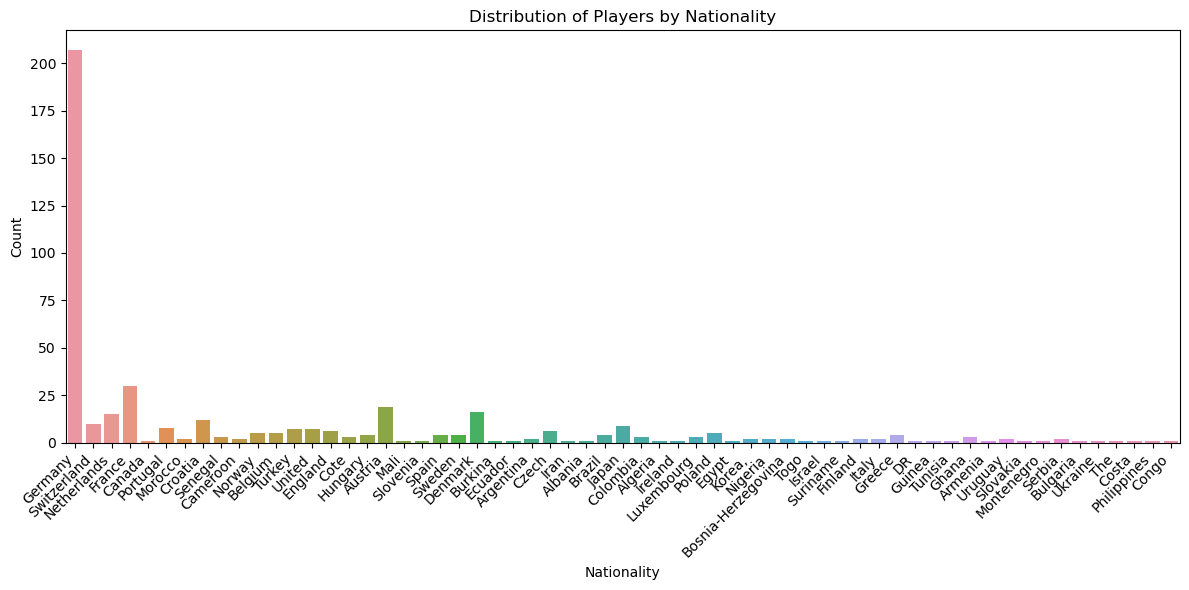

In [236]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data,x='first_nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Distribution of Players by Nationality')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

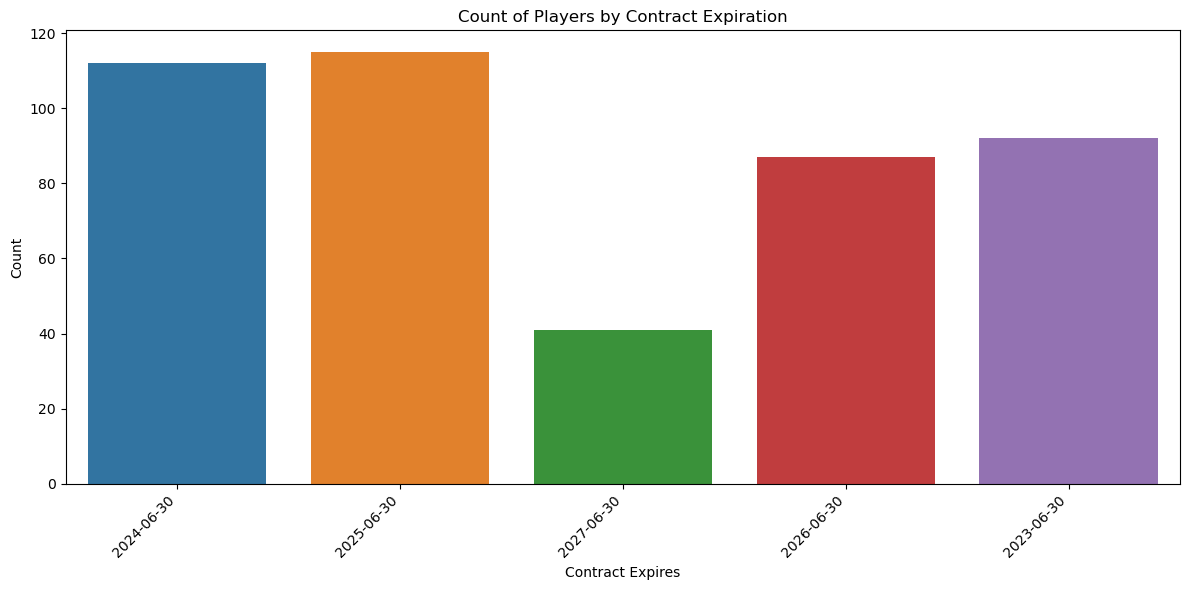

In [237]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='contract_expires')
plt.xlabel('Contract Expires')
plt.ylabel('Count')
plt.title('Count of Players by Contract Expiration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()